<a href="https://colab.research.google.com/github/arethel/RegressionDecisionTree/blob/main/Regression_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = np.array(
[['Asset Flip', 100, 1000],
['Text Based', 500, 3000],
['Visual Novel', 1500, 5000],
['2D Pixel Art', 3500, 8000],
['2D Vector Art', 5000, 6500],
['Strategy', 6000, 7000],
['First Person Shooter', 8000, 15000],
['Simulator', 9500, 20000],
['Racing', 12000, 21000],
['RPG', 14000, 25000],
['Sandbox', 15500, 27000],
['Open-World', 16500, 30000],
['MMOFPS', 25000, 52000],
['MMORPG', 30000, 80000]
])
print(dataset)


[['Asset Flip' '100' '1000']
 ['Text Based' '500' '3000']
 ['Visual Novel' '1500' '5000']
 ['2D Pixel Art' '3500' '8000']
 ['2D Vector Art' '5000' '6500']
 ['Strategy' '6000' '7000']
 ['First Person Shooter' '8000' '15000']
 ['Simulator' '9500' '20000']
 ['Racing' '12000' '21000']
 ['RPG' '14000' '25000']
 ['Sandbox' '15500' '27000']
 ['Open-World' '16500' '30000']
 ['MMOFPS' '25000' '52000']
 ['MMORPG' '30000' '80000']]


In [5]:
X = dataset[:, 1:2].astype(int)
print(X)

[[  100]
 [  500]
 [ 1500]
 [ 3500]
 [ 5000]
 [ 6000]
 [ 8000]
 [ 9500]
 [12000]
 [14000]
 [15500]
 [16500]
 [25000]
 [30000]]


In [6]:
y = dataset[:, 2].astype(int)
print(y)

[ 1000  3000  5000  8000  6500  7000 15000 20000 21000 25000 27000 30000
 52000 80000]


In [9]:
X_and_y = dataset[:, 1:3].astype(int)
X_and_y

array([[  100,  1000],
       [  500,  3000],
       [ 1500,  5000],
       [ 3500,  8000],
       [ 5000,  6500],
       [ 6000,  7000],
       [ 8000, 15000],
       [ 9500, 20000],
       [12000, 21000],
       [14000, 25000],
       [15500, 27000],
       [16500, 30000],
       [25000, 52000],
       [30000, 80000]])

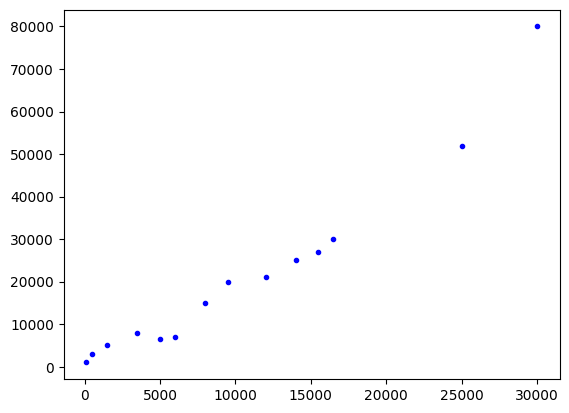

In [7]:
plt.plot(X[:, 0], y,'b.')

In [37]:
def split_node(j, node):
    for idx in range(len(node)):
        if node[idx][0]>j:
            return node[0:idx], node[idx:len(node)+1]

In [38]:
def get_mean_of_node(node):
    return np.sum(node[:,1])/float(len(node))

In [39]:
def regression_criteria(node):
    y_mean = get_mean_of_node(node)
    criteria = np.sqrt(np.sum(list(map(lambda x: (y_mean-x)**2, node[:,1]))))
    return criteria

In [40]:
def quality(node1, node2):
    len_ = float(len(node1) + len(node2))
    return float(len(node1))/len_*regression_criteria(node1)+float(len(node2))/len_*regression_criteria(node2)

In [41]:
def find_best_split(node):
    final_t = float('inf')
    min_quality = float('inf')
    for idx in range(len(node)-1):
        t = (node[idx][0]+node[idx+1][0])/2
        splited_node1, splited_node2 = split_node(t, node)
        quality_ = quality(splited_node1, splited_node2)
        if quality_<min_quality:
            min_quality = quality_
            final_t = t

    return final_t

In [78]:
def get_final_ts(input_node, n_depth, current_depth=0):
    t = find_best_split(input_node)
    if t!=float('inf'):
        split1, split2 = split_node(t, input_node)
        current_depth+=1
        if current_depth<=n_depth:
            return[t,get_final_ts(split1, n_depth, current_depth),get_final_ts(split2, n_depth, current_depth)]
        else:
            return [get_mean_of_node(input_node)]
    else:
        return [get_mean_of_node(input_node)]


In [79]:
def final_tree_fun(x, ts):
    if len(ts)==1:
        return ts[0]
    if x<ts[0]:
        return final_tree_fun(x, ts[1])
    else:
        return final_tree_fun(x, ts[2])

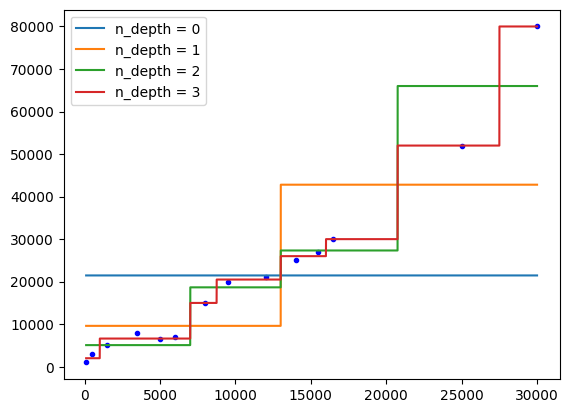

In [89]:
plt.plot(X[:, 0], y,'b.')


for i in range(4):
    ts = get_final_ts(X_and_y, i)
    x_range = np.arange(np.min(X[:, 0]),np.max(X[:, 0]), 0.1)
    plt.plot(x_range, list(map(lambda x: final_tree_fun(x, ts), x_range)),'-', label=f'n_depth = {i}')
plt.legend()